---------------------------------------------------------------------------------------------------------------------------
This tutorial relies on the example model provided by `wasar`, which is built from real public datasets belonging to a small area near the Doñana National Park (southern Spain). The model can be accessed directly through  `wasar.example.get_model()` and the relative paths to the data, through `wasar.example.get_path()`.
For more information about the data sources, see the file *Data Sources.txt*, located in the same folder as this tutorial.

Fore **more information** about the use of any function, method, class o moduel, use `help` bult-in (or `?`) to acces its documentation:

`>>> help(wasar.parts)` or press the **tabulator** key in Jupyter Notebook to access an object's methods.

---------------------------------------------------------------------------------------------------------------------------

<h1><center>Visualizing with plot and mapa</center></h1>

First of all, if the output graphs are desired to be displayed in the **center of the cell**, the following commands must be included after wasar import:

In [1]:
import wasar

from IPython.core.display import HTML
HTML("""<style>.output_png {display: table-cell; text-align: center; vertical-align: middle;}</style>""")

In `wasar` there are two methods to visualize the data, both from model and parts: `plot` and `map`.

## **`plot`**
It is used to display the **time series of the object**. Although its operation is very similar in all the objects that have this method, it differs a little in some of them. While `Dataset.plot` plots all the PS time series of the DInSAR dataset in one graph, in other part type objects you have to specify the sensors you want to plot --or all of them will be plotted. 

    It returns a matplotlib plot, to which you can usually add information through the `**kwargs`.
    
    In the following example I plot the **average deformation** (in the LOS direction) of the `Asc` dataset of aggregate 2.

Geometría añadida correctamente.
Geometría añadida correctamente.


<AxesSubplot:title={'center':'Plotting example'}, ylabel='Deformación (cm)'>

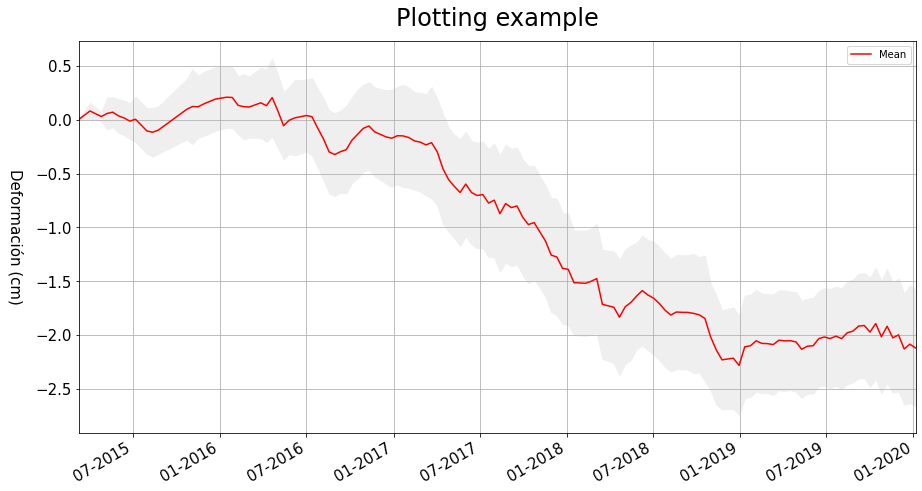

In [2]:
Doñana = wasar.example.get_model()

A2 = Doñana.agregado('2')

A2.subset('Asc').plot(mean=True, title='Plotting example', color='red')
#'title' and 'color' passed as **kwargs to matplotlib plotting function

By default, when plotting the average deformation of a Dataset, the shading of +- 1 **standard deviation** values is also included. This can be disabled with `std=False`.

I can also directly visualize all the information of this **aggregate** with

`A2.plot()`.

Or choose the specific subset with 

`A2.plot(subsets='Asc')`.

With the following command I visualize all the time series of the **rainfall** database.

<AxesSubplot:title={'center':'All rainfall stations'}, xlabel='Fechas', ylabel='Precipitación (mm)'>

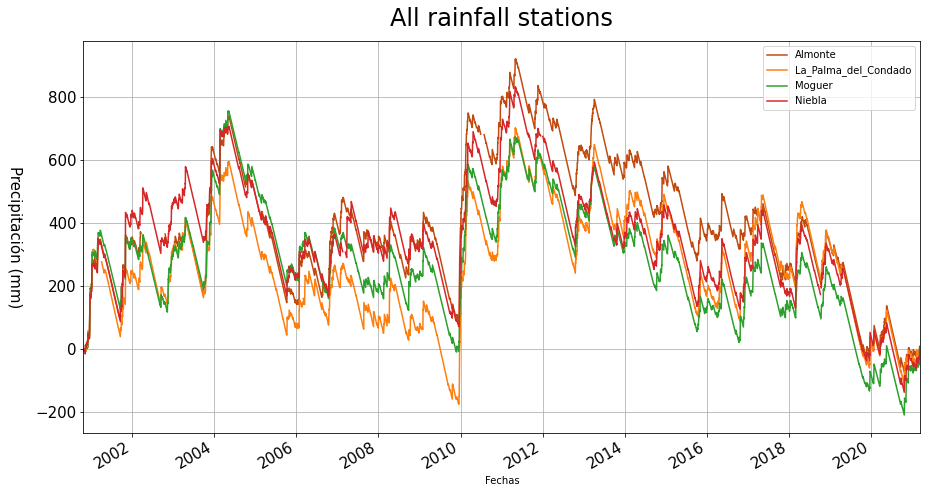

In [3]:
Doñana.get('P').plot(title='All rainfall stations')

## `mapa`

Allows to display all **spatial information**. By default it uses `folium` library, which allows to add **background base maps** (known as *tiles*) and make the visualization interactive. This library requires an internet connection, otherwise a blank map will be displayed.

In [4]:
Doñana.mapa()

You can also visualize the data **without using folium**, through matplotlib, simply using the `basemap` argument.

`Doñana.mapa(basemap=False)`

When using folium (`basemap=True`, default), `**kwargs` are passed to the [folium.Map](https://python-visualization.github.io/folium/modules.html#folium.folium.Map) function, while when `basemap=False` they are passed to the [GeoDataFrame.plot](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html) function, this latter based on matplotlib.

Among the `**kwargs` of `mapa` stands out **`m`**, which allows passing a `folium.Map` object to the function. In this way, very complete **combined maps** can be made. The only requirement is that the previous maps do not have a layer control (`LayerControl=False`).

In the following **example** I show a composite map with **all the information of the model**: aggregates, DInSAR datasets and databases.

In [5]:
mymap = Doñana.mapa(LayerControl=False)

Doñana.get('Asc').mapa(m=mymap, LayerControl=False)
Doñana.get('Desc').mapa(m=mymap, LayerControl=False)
Doñana.get('P').mapa(m=mymap, LayerControl=False)
Doñana.get('Piezo_bbdd').mapa(m=mymap)  # I include LayerControl (default, True) in the last map.

mymap

In both cases you can **save the figure** in the working directory with `savefig=True` argument. The figure will be saved as an *html* file if you use folium or a *png* if you use matplotlib. If you want to specify more parameters about the saving of the images, I suggest to do it as follows:

In [6]:
%%capture

# Saving a folium plot
Doñana.mapa().save('ExampleMap.html')

# Saving a matplotlib plot
Doñana.mapa(basemap=False).figure.savefig('ExampleMap.png', dpi=300)

## Other issues:

 - I suggest **piciking the colors** from [*RGB-colors*](https://htmlcolorcodes.com/es/) website when chossing one. Remember that only [matplotlib colors](https://matplotlib.org/stable/tutorials/colors/colors.html) are available in `wasar`.
 
 
 - By default, Jupyter shows all **figures** that are being creating, even when it is **not desired to be shown**. If you want to avoid this --a process that requires execution time-- for example while automatically studying several aggregates through `porLotes` model method, you can include the following command on the header of the cell, just like on the latter cell of this tutorial.
 
  `%%capture`